**Punto 2**

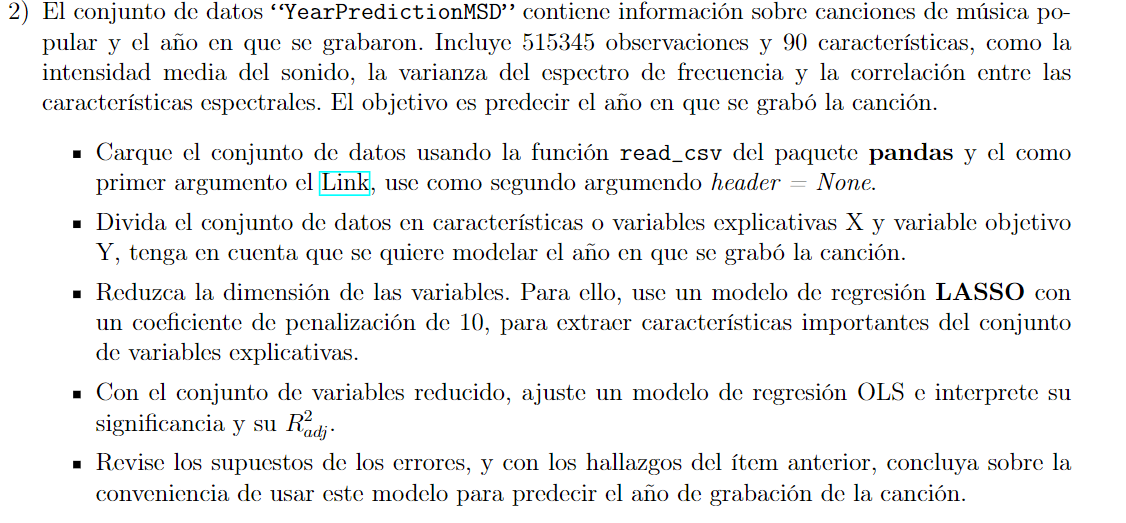

In [ ]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
from scipy.stats import ttest_1samp
from scipy.stats import shapiro, kstest, jarque_bera, probplot
import pylab
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# Cargar el conjunto de datos
df = pd.read_csv('Examen 1-20240924\yearpredictionmsd\YearPredictionMSD.txt', header=None)
print("Examen 1-20240924\yearpredictionmsd\YearPredictionMSD.txt preview:")
print(df.head())



Examen 1-20240924\yearpredictionmsd\YearPredictionMSD.txt preview:
     0         1         2         3         4         5         6         7   \
0  2001  49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905 -25.01202   
1  2001  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   8.76630   
2  2001  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940  -3.27872   
3  2001  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   5.05097   
4  2001  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409 -12.48207   

         8         9   ...        81         82        83        84        85  \
0 -12.23257   7.83089  ...  13.01620  -54.40548  58.99367  15.37344   1.11144   
1  -0.92019  18.76548  ...   5.66812  -19.68073  33.04964  42.87836  -9.90378   
2  -2.35035  16.07017  ...   3.03800   26.05866 -50.92779  10.93792  -0.07568   
3 -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705 -46.67617 -12.51516   
4  -9.37636  12.63699  ...   9.92661  -55

**1) Analisis Exploratorio de datos**

In [3]:
##Preprocesamiento de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515345 entries, 0 to 515344
Data columns (total 91 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       515345 non-null  int64  
 1   1       515345 non-null  float64
 2   2       515345 non-null  float64
 3   3       515345 non-null  float64
 4   4       515345 non-null  float64
 5   5       515345 non-null  float64
 6   6       515345 non-null  float64
 7   7       515345 non-null  float64
 8   8       515345 non-null  float64
 9   9       515345 non-null  float64
 10  10      515345 non-null  float64
 11  11      515345 non-null  float64
 12  12      515345 non-null  float64
 13  13      515345 non-null  float64
 14  14      515345 non-null  float64
 15  15      515345 non-null  float64
 16  16      515345 non-null  float64
 17  17      515345 non-null  float64
 18  18      515345 non-null  float64
 19  19      515345 non-null  float64
 20  20      515345 non-null  float64
 21  21      51

In [4]:
# Asignar nombres a las columnas
# La primera columna es el año, las siguientes son características
columnas = ['year'] + [f'feature_{i}' for i in range(1, 91)]
df.columns = columnas

# Verificar los nombres de las columnas
print(df.columns)


Index(['year', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25',
       'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30',
       'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35',
       'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40',
       'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45',
       'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50',
       'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55',
       'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60',
       'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_65',


In [5]:
# Estadísticas descriptivas para la variable objetivo
print(df['year'].describe())

# Estadísticas descriptivas para las características
print(df.iloc[:, 1:].describe())


count    515345.000000
mean       1998.397082
std          10.931046
min        1922.000000
25%        1994.000000
50%        2002.000000
75%        2006.000000
max        2011.000000
Name: year, dtype: float64
           feature_1      feature_2      feature_3      feature_4  \
count  515345.000000  515345.000000  515345.000000  515345.000000   
mean       43.387126       1.289554       8.658347       1.164124   
std         6.067558      51.580351      35.268585      16.322790   
min         1.749000    -337.092500    -301.005060    -154.183580   
25%        39.954690     -26.059520     -11.462710      -8.487500   
50%        44.258500       8.417850      10.476320      -0.652840   
75%        47.833890      36.124010      29.764820       8.787540   
max        61.970140     384.065730     322.851430     335.771820   

           feature_5      feature_6      feature_7      feature_8  \
count  515345.000000  515345.000000  515345.000000  515345.000000   
mean       -6.553601      -9.

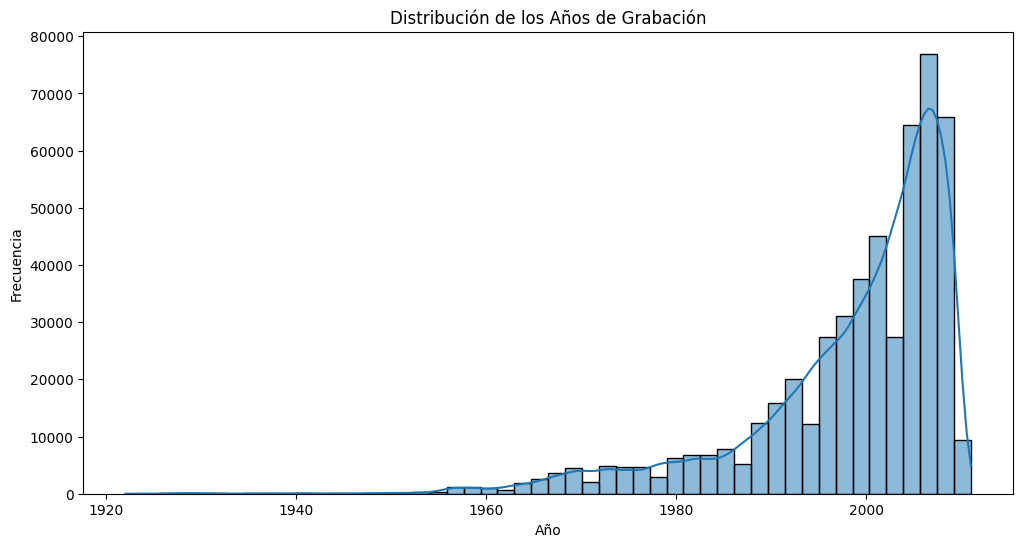

In [6]:
import seaborn as sns   
plt.figure(figsize=(12,6))
sns.histplot(df['year'], bins=50, kde=True)
plt.title('Distribución de los Años de Grabación')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()


In [7]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Seleccionar la correlación con la variable objetivo
correlation_with_target = correlation_matrix['year'].sort_values(ascending=False)
print(correlation_with_target)


year          1.000000
feature_1     0.225374
feature_7     0.110460
feature_47    0.096088
feature_20    0.087057
                ...   
feature_67   -0.102841
feature_40   -0.123974
feature_63   -0.126348
feature_3    -0.139541
feature_6    -0.187443
Name: year, Length: 91, dtype: float64


**Una vez realizado el EDA correspondiente a los datos nos damos cuenta que no hay faltantes ni nulos, por lo cual podemos proseguir con el modelo de regression LASSO**

**División del conjunto de datos**

In [8]:
#Dividir en X y Y
Y = df['year']
X = df.drop('year', axis=1)

In [9]:
#Dividir en entrenamiento y prueba (80%-20%)
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones X_test:", X_test.shape)
print("Dimensiones Y_train:", Y_train.shape)
print("Dimensiones Y_test:", Y_test.shape)

Dimensiones de X_train: (412276, 90)
Dimensiones X_test: (103069, 90)
Dimensiones Y_train: (412276,)
Dimensiones Y_test: (103069,)


**Reduccion de la dimension de las variables**

In [10]:
#Reducción de dimensionalidad con LASSO
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dimensiones de X_train_scaled:", X_train_scaled.shape)
print("Dimensiones X_test_scaled:", X_test_scaled.shape)

Dimensiones de X_train_scaled: (412276, 90)
Dimensiones X_test_scaled: (103069, 90)


In [11]:
lasso = Lasso(alpha=10, max_iter=10000, random_state=42)
lasso.fit(X_train_scaled, Y_train)

coeficientes = pd.Series(lasso.coef_, index=X.columns)
caracteristicas_importantes = coeficientes[coeficientes != 0].index.tolist()


print("Índices de características importantes:", caracteristicas_importantes)
print("Número de características importantes:", len(caracteristicas_importantes))

Índices de características importantes: []
Número de características importantes: 0


**Ajuste del modelo**

In [12]:
# Seleccionar las características importantes en el conjunto de entrenamiento
X_train_reducido = X_train[caracteristicas_importantes]

# Añadir una constante para el intercepto
X_train_reducido = sm.add_constant(X_train_reducido)

# Hacer lo mismo para el conjunto de prueba
X_test_reducido = X_test[caracteristicas_importantes]
X_test_reducido = sm.add_constant(X_test_reducido)


In [13]:
# Ajustar el modelo OLS en el conjunto de entrenamiento completo
modelo = sm.OLS(Y_train, X_train_reducido).fit()

# Resumen del modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                   year   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 13 Nov 2024   Prob (F-statistic):                nan
Time:                        18:20:11   Log-Likelihood:            -1.5712e+06
No. Observations:              412276   AIC:                         3.142e+06
Df Residuals:                  412275   BIC:                         3.142e+06
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1998.3903      0.017   1.17e+05      0.0

**El modelo de regresión OLS mostrado, ajustado con un alpha de 10, es extremadamente restrictivo. Con un R-cuadrado de 0.000 dado esto, y siguiendo la recomendación del profesor Henry, para continuar el ejercicio se ajustará el valor de alpha a 1, con el fin de mejorar la capacidad explicativa del modelo añadiendo variables predictoras**

**Modelo de regresión lineal Lasso con Alpha = 1**

**División del conjunto de datos**

In [14]:
#Dividir en X y Y
Y1 = df['year']
X1 = df.drop('year', axis=1)

In [15]:
#Dividir en entrenamiento y prueba (80-20)
X1_train, X1_test, Y1_train, Y1_test = train_test_split( X1, Y1, test_size=0.2, random_state=42)

print("Dimensiones de X_train:", X1_train.shape)
print("Dimensiones X_test:", X1_test.shape)
print("Dimensiones Y_train:", Y1_train.shape)
print("Dimensiones Y_test:", Y1_test.shape)

Dimensiones de X_train: (412276, 90)
Dimensiones X_test: (103069, 90)
Dimensiones Y_train: (412276,)
Dimensiones Y_test: (103069,)


**Reduccion de la dimension de las variables**

In [16]:
#Reducción de dimensionalidad con LASSO
scaler1 = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

print("Dimensiones de X_train_scaled:", X1_train_scaled.shape)
print("Dimensiones X_test_scaled:", X1_test_scaled.shape)

Dimensiones de X_train_scaled: (412276, 90)
Dimensiones X_test_scaled: (103069, 90)


In [17]:
lasso1 = Lasso(alpha=1.0, max_iter=10000, random_state=42)
lasso1.fit(X1_train_scaled, Y1_train)

coeficientes_1 = pd.Series(lasso1.coef_, index=X.columns)
caracteristicas_importantes_1 = coeficientes_1[coeficientes_1 != 0].index.tolist()


print("Índices de características importantes:", caracteristicas_importantes_1)
print("Número de características importantes:", len(caracteristicas_importantes_1))

Índices de características importantes: ['feature_1', 'feature_3', 'feature_6', 'feature_14', 'feature_20', 'feature_40']
Número de características importantes: 6


**Ajuste del modelo**

In [18]:
# Seleccionar las características importantes en el conjunto de entrenamiento
X1_train_reducido = X1_train[caracteristicas_importantes_1]

# Añadir una constante para el intercepto
X1_train_reducido = sm.add_constant(X1_train_reducido)

# Hacer lo mismo para el conjunto de prueba
X1_test_reducido = X_test[caracteristicas_importantes_1]
X1_test_reducido = sm.add_constant(X1_test_reducido)


In [19]:
# Ajustar el modelo OLS en el conjunto de entrenamiento completo
modelo1 = sm.OLS(Y1_train, X1_train_reducido).fit()

# Resumen del modelo
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                   year   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                 1.236e+04
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:20:19   Log-Likelihood:            -1.5371e+06
No. Observations:              412276   AIC:                         3.074e+06
Df Residuals:                  412269   BIC:                         3.074e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1968.3275      0.144   1.37e+04      0.0

**Validación de supuestos de los datos**

TtestResult(statistic=5.406041418656997e-10, pvalue=0.9999999995686606, df=412275)


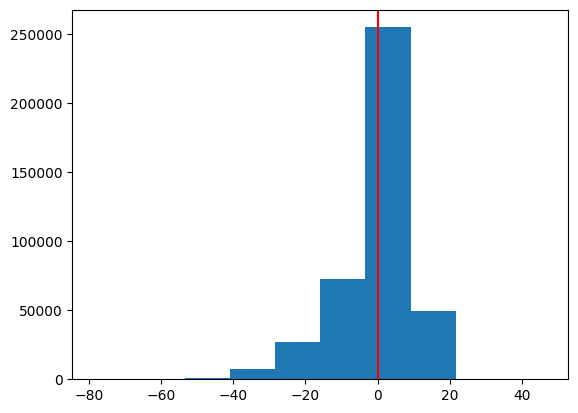

In [ ]:
## linealidad de los residuos
# Valores ajustados y residuos
residuales = modelo1.resid

## 1) Media cero en los residales

## H0: E[e_i] = 0 vs H1: E[e_i] != 0
print(ttest_1samp(residuales, 0))

plt.hist(residuales)
plt.axvline(np.mean(residuales), color = "red")
plt.show()

#### Como p-valor = 1 > 0.05, con un nivel de significancia alfa = 0.05, no existe evidencia muestral suficiente
#### para rechazar la hipotesis nula


**Interpretación**

**- Hipótesis nula (H0): La media de los residuos es igual a cero.**

**- Hipótesis alternativa (H1): La media de los residuos no es igual a cero.**

Dado que el valor p es extremadamente alto (0.9999999995686606), no rechazamos la hipótesis nula. Esto significa que no hay suficiente evidencia para concluir que la media de los residuos es diferente de cero. En otras palabras, la media de los residuos es efectivamente cero, lo cual es una buena señal de que el modelo no tiene sesgo sistemático.

c:\Users\desja\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 412276.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.8971717504375794, pvalue=1.4522784900089554e-141)
KstestResult(statistic=0.4907478788897787, pvalue=0.0, statistic_location=2.003829056132645, statistic_sign=-1)
SignificanceResult(statistic=271430.89498752553, pvalue=0.0)


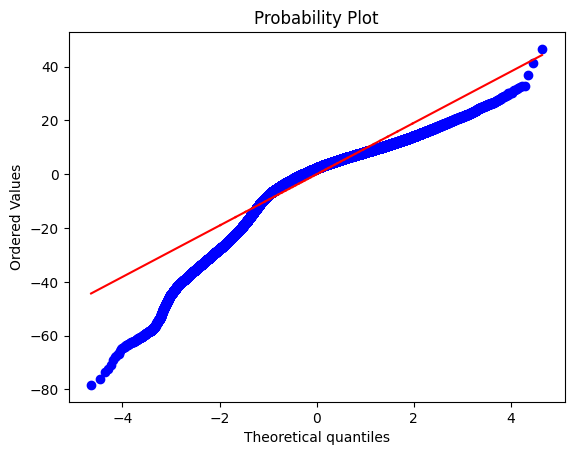

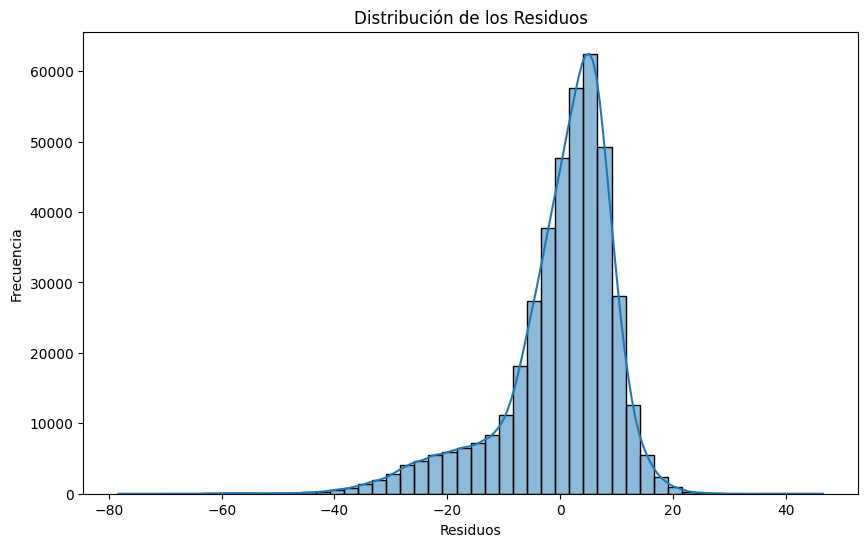

In [31]:
## 2) Normalidad
### H0: e_i~Normal vs H1: e_i !~ Normal


print(shapiro(residuales))
print(kstest(residuales, "norm"))
print(jarque_bera(residuales))

### Grafico QQ-plot para Normalidad
probplot(residuales, dist = "norm", plot = pylab)
plt.show()

# Histograma de los residuos
plt.figure(figsize=(10,6))
sns.histplot(residuales, bins=50, kde=True)
plt.title('Distribución de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

NO NORMALIDAD: Por Shapiro Wilks: Como pvalor= 0 < $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5% existe evidencia suficiente para  rechazar la hipotesis nula.  Por lo tanto, los residuos no son normales.


NO NORMALIDAD: Por Kolmogorov-Smirnov: Como pvalor= 0.0 < $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5% EXISTE evidencia suficiente para  rechazar la hipotesis nula. Por lo tanto, los residuos no son normales.


NO NORMALIDAD: Por Jarque-Bera: Como pvalor=0.0 = $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5% existe evidencia suficiente para  rechazar la hipotesis nula.  Por lo tanto, los residuos no son normales.
.

2.0009957981154596


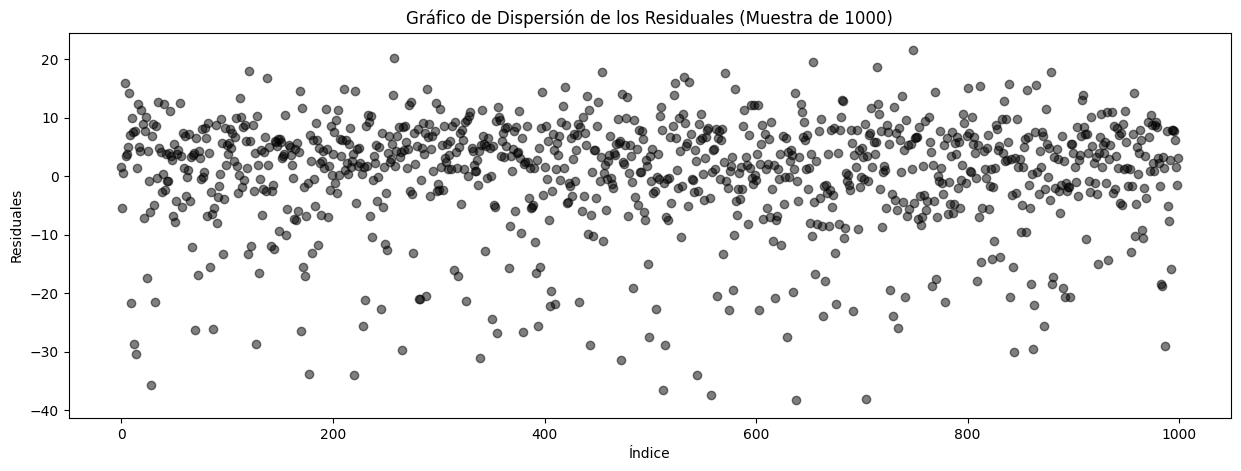

In [ ]:


### 3) Independencia en los residuales (Test de autocorrelacion)
### H0: Corr(e_i, e_i+1) = 0 vs H1: Corr(e_i, e_i+1) != 0
print(durbin_watson(residuales))

# Ajustar los parámetros de matplotlib
plt.rcParams['agg.path.chunksize'] = 10000  # Ajusta este valor según sea necesario

# Seleccionar una muestra de los residuales para el gráfico de dispersión
sample_size = 1000  # Ajusta este valor según sea necesario
residuales_sample = np.random.choice(residuales, sample_size, replace=False)

# Gráfico de dispersión de los residuales
plt.figure(figsize=(15, 5))
plt.scatter(range(len(residuales_sample)), residuales_sample, color="black", alpha=0.5)
plt.title('Gráfico de Dispersión de los Residuales (Muestra de 1000)')
plt.xlabel('Índice')
plt.ylabel('Residuales')
plt.show()



Interpretación:

Si el valor DW está en el intervalo [1.5, 2.5], no se rechaza la hipótesis nula, lo que indica que no hay suficiente evidencia para concluir que existe autocorrelación en los residuos.
Si el valor DW está fuera del intervalo [1.5, 2.5], se rechaza la hipótesis nula, lo que indica que hay evidencia de autocorrelación en los residuos.

Conclusión:

Dado que el valor DW es 2.0009957981154596, que está contenido en el intervalo [1.5, 2.5], no existe suficiente evidencia muestral para rechazar la hipótesis nula. Por lo tanto, se supone que los residuos son independientes.

In [ ]:
### 4) Test de homocedasticidad
# Prueba de Breusch-Pagan

### H0: V[e_i] = cte vs H1: V[e_i] != cte

bp_test = het_breuschpagan(residuales, modelo1.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
result_bp = dict(zip(labels, bp_test))
print("Prueba de Breusch-Pagan:", result_bp)


Prueba de Breusch-Pagan: {'Lagrange multiplier statistic': 35547.46572497641, 'p-value': 0.0, 'f-value': 6483.50063491236, 'f p-value': 0.0}


**Interpretación:**

Como el p-valor 0.0 < alfa, donde alfa=0.05, con un nivel de significancia del 5%, existe evidencia muestral suficiente para rechazar la hipotesis nula por lo tanto supongo heterosedasticidad


In [36]:
# Realizar predicciones en el conjunto de prueba
Y_pred_test = modelo1.predict(X1_test_reducido)

# Evaluar el rendimiento utilizando R² y RMSE
r2_test = r2_score(Y1_test, Y_pred_test)
n = X1_test_reducido.shape[0]
p = X1_test_reducido.shape[1] - 1
r2_test_adjusted = 1 - (1 - r2_test) * (n - 1) / (n - p - 1)
mse_test = mean_squared_error(Y1_test, Y_pred_test)
rmse_test = np.sqrt(mse_test)



# Realizar predicciones en el conjunto de entrenamiento
Y_pred_train = modelo1.predict(X1_train_reducido)

# Evaluar el rendimiento en el conjunto de entrenamiento
r2_train = r2_score(Y_train, Y_pred_train)
n_train = X1_train_reducido.shape[0]
p_train = X1_train_reducido.shape[1] - 1
r2_train_adjusted = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p_train - 1)
mse_train = mean_squared_error(Y_train, Y_pred_train)
rmse_train = np.sqrt(mse_train)

# Mostrar los resultados
print(f"R² adj en el conjunto de entrenamiento: {r2_train_adjusted:.4f}")
print(f"RMSE en el conjunto de entrenamiento: {rmse_train:.4f}")
print(f"R² adj en el conjunto de prueba: {r2_test_adjusted:.4f}")
print(f"RMSE en el conjunto de prueba: {rmse_test:.4f}")

R² adj en el conjunto de entrenamiento: 0.1524
RMSE en el conjunto de entrenamiento: 10.0684
R² adj en el conjunto de prueba: 0.1543
RMSE en el conjunto de prueba: 10.0321


**Interpretacion:**

**R² ajustado de entrenamiento y prueba**: Un R² de 0.1524 en el conjunto de entrenamiento y de 0.1544 en el de prueba indican que el modelo no está capturando bien la variabilidad en los datos, explicando solo el 15.24% y el 15.44%, respectivamente. Esto podría deberse a varias razones, como la elección de un modelo inadecuado, lo que sugiere que el modelo en general no está capturando adecuadamente la variabilidad de los datos ni las relaciones entre las características y la variable objetivo.

**RMSE de entrenamiento y prueba**: Un RMSE de 10.0684 en el conjunto de entrenamiento y de 10.0321 en el de prueba indica que, en promedio, las predicciones del modelo tienen un error de aproximadamente 10 unidades. Este valor puede ser significativo dependiendo del rango de la variable objetivo, lo que sugiere que el modelo tiene un margen de error considerable y podría no ser suficientemente preciso para predicciones confiables.

**Conclusiónes y recomendaciones:**

El modelo no es ideal para la predicción de las canciones, debido a su bajo R² ajustado y alto RMSE, lo que indica una baja capacidad explicativa. En este caso, solo el 15% de la variabilidad de los datos es explicada por el modelo, lo cual sugiere que no está capturando bien las relaciones subyacentes.

Por otro lado, el alto valor de RMSE implica que, en promedio, los errores de predicción son de aproximadamente 10 años. Este margen de error considerable reduce la precisión del modelo, lo que podría llevar a conclusiones inexactas y limitar su utilidad.

En cuanto a recomendaciones seria interesante tener en cuenta los diferentes ajustes de los hiperparametros como por ejemplo tener en cuenta una CV para encontrar los mejores hiperparametros del modelo. Tambien probar diferentes modelo de aprendizaje como random forest, gradient boosting y observar cual tiene mejor rendimiento, teniendo en cuenta que estos dos modelos tiene un gran gasto en cuanto tiempo.
